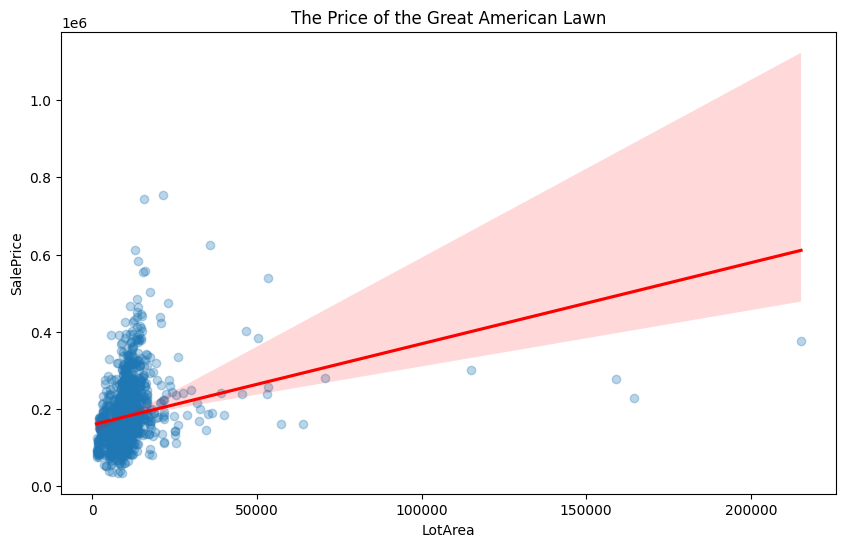

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
plt.figure(figsize=(10, 6))
sns.regplot(x='LotArea', y='SalePrice', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('The Price of the Great American Lawn')
plt.show()

In [2]:
outliers = df[df['LotArea'] > 40000].sort_values(by='LotArea', ascending=False)
print(outliers[['LotArea', 'SalePrice', 'OverallQual', 'Neighborhood', 'MSZoning']])

      LotArea  SalePrice  OverallQual Neighborhood MSZoning
313    215245     375000            7       Timber       RL
335    164660     228950            5       Timber       RL
249    159000     277000            6      ClearCr       RL
706    115149     302000            7      ClearCr       RL
451     70761     280000            7      ClearCr       RL
1298    63887     160000           10      Edwards       RL
1396    57200     160000            5       Timber       RL
769     53504     538000            8      StoneBr       RL
457     53227     256000            4      ClearCr       RL
384     53107     240000            6      ClearCr       RL
53      50271     385000            9      Veenker       RL
661     46589     402000            8      NoRidge       RL
848     45600     240000            6      ClearCr       RL
523     40094     184750           10      Edwards       RL


In [3]:
target_ids = [1298, 523]
deep_dive = df.loc[target_ids]
print(deep_dive[['LotArea', 'SalePrice', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GrLivArea']])

      LotArea  SalePrice  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1298    63887     160000           10            5       2008          2008   
523     40094     184750           10            5       2007          2008   

      GrLivArea  
1298       5642  
523        4676  


元のデータ件数: 1460
浄化後のデータ件数: 1458


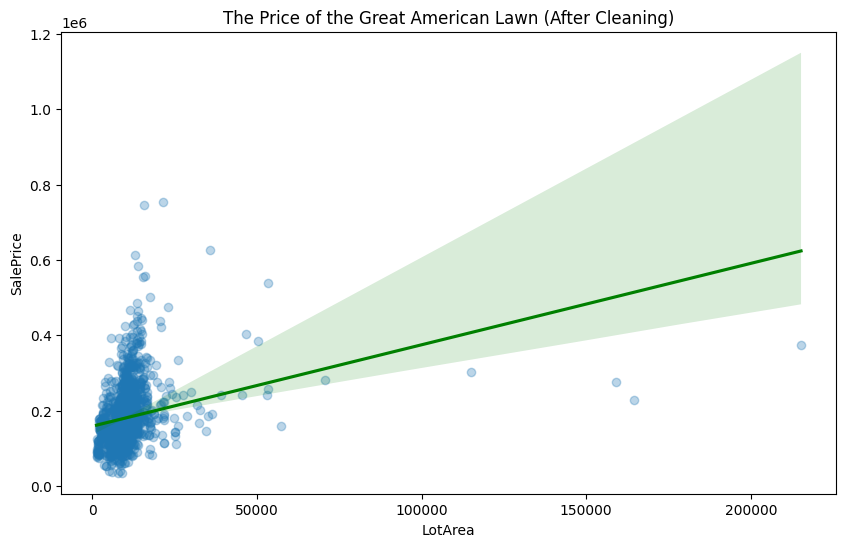

In [4]:
df_cleaned = df.drop(index=[1298, 523])
print(f"元のデータ件数: {len(df)}")
print(f"浄化後のデータ件数: {len(df_cleaned)}")
plt.figure(figsize=(10, 6))
sns.regplot(x='LotArea', y='SalePrice', data=df_cleaned,
            scatter_kws={'alpha':0.3}, line_kws={'color':'green'}) # 浄化の緑！
plt.title('The Price of the Great American Lawn (After Cleaning)')
plt.show()

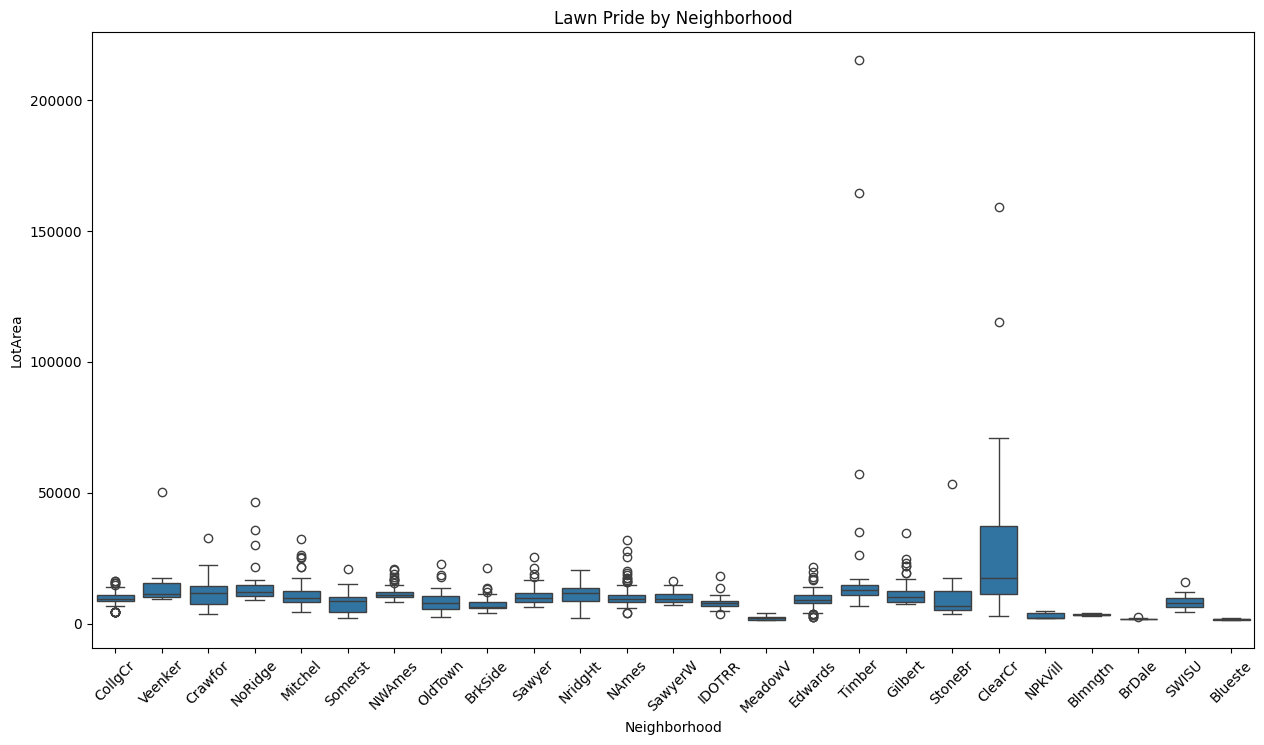

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='LotArea', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Lawn Pride by Neighborhood')
plt.show()

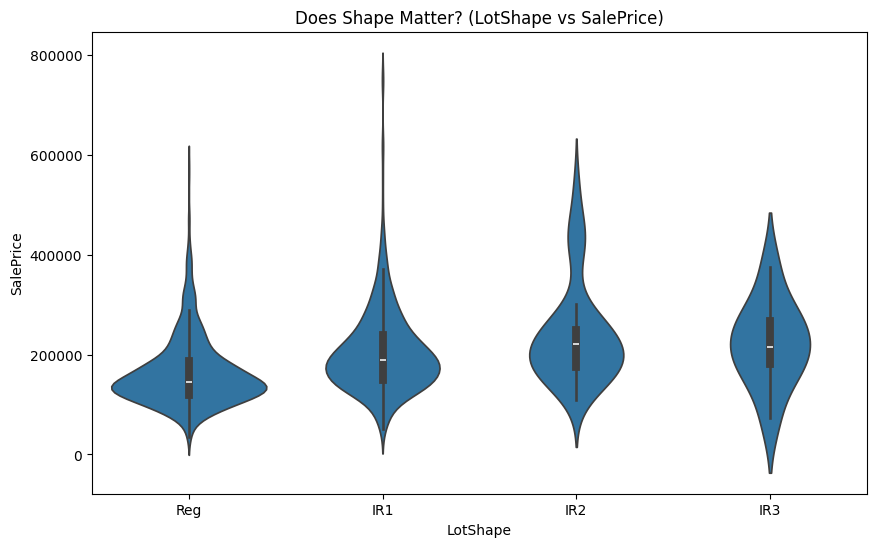

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='LotShape', y='SalePrice', data=df_cleaned)
plt.title('Does Shape Matter? (LotShape vs SalePrice)')
plt.show()

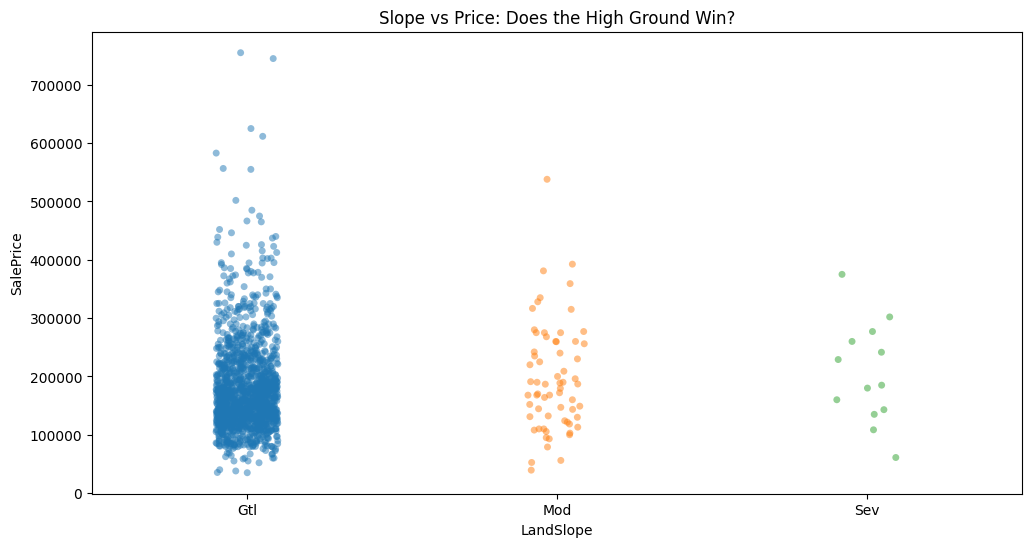

In [9]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='LandSlope', y='SalePrice', hue='LandSlope', data=df_cleaned, jitter=True, alpha=0.5)
plt.title('Slope vs Price: Does the High Ground Win?')
plt.show()

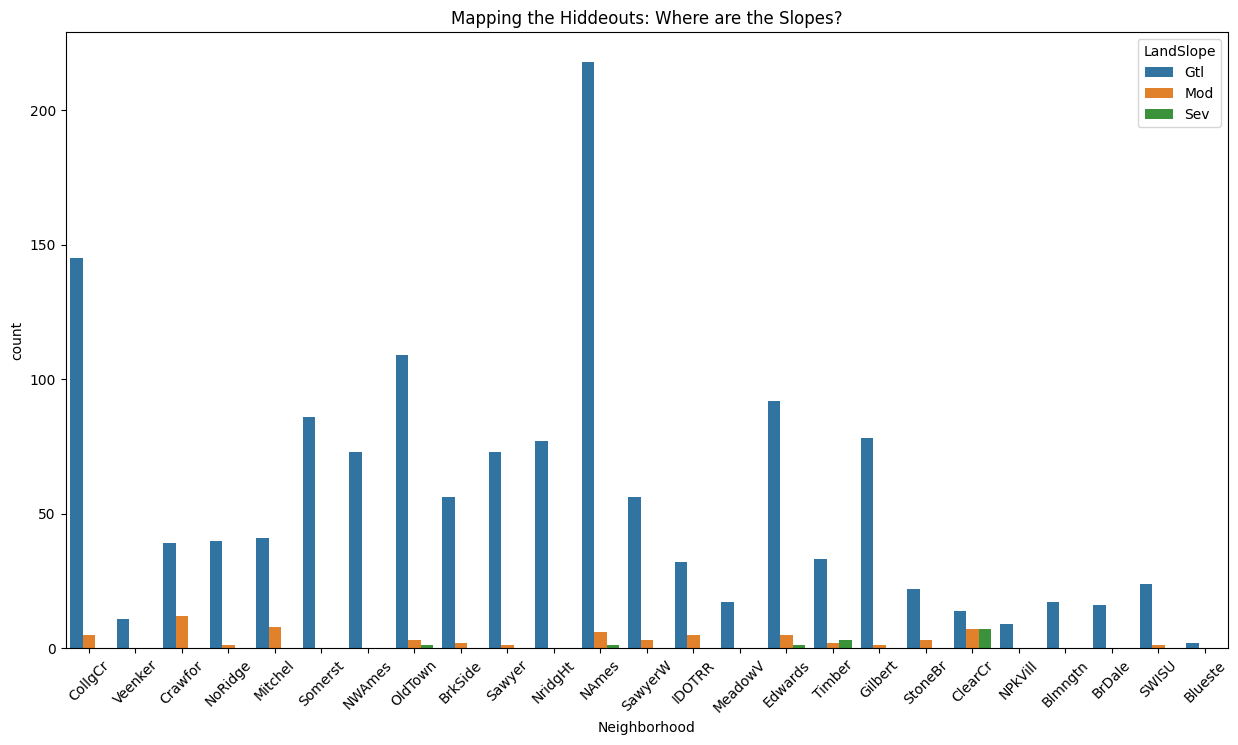

In [10]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Neighborhood', hue='LandSlope', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Mapping the Hiddeouts: Where are the Slopes?')
plt.show()

**「芝生の怪物（1298番）」**を特定し、その「安すぎる謎」を記録に残しつつ排除しました。

**「土地の形（LotShape）」**が、四角い（Reg）よりも「いびつ（IR）」な方が高価になりやすい逆転現象を暴きました。

そして、希少な**「急坂（Sev）」の家**が、特定の高級・広大エリア（ClearCrなど）に潜伏していることを突き止めました